# Named Entity Recognition

In [1]:
import pandas as pd
book = pd.read_csv("apple.txt", error_bad_lines=False)

b'Skipping line 6: expected 1 fields, saw 14\n'


In [2]:
book = [x.strip() for x in book.x] #  removing left and right spaces in all string 
book = [x for x in book if x] # remove empty strings
book[0:10]

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders",
 "Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by wo

In [6]:
import spacy # language module
nlp = spacy.load('en_core_web_sm')

In [11]:
# Part of Speech Tagging
one_block = book[2]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent',  jupyter=True)

In [12]:
one_block

"Best Laptop under 60k. If you don't want any accounting softwares like tally or busy then go for it, better than windows in every term. I just love it's battery life with sleek look 😍Now talking about MS officeIt's available on app store, free for 1 monthAfter that you will have to pay.You cannot install pirated version but if you install Windows 7 or any other version then u can use Ms office for freeBut in MacBook there are other apps which are good substitute for Ms office appsNumbers for ExcelPages for wordKeynote for PowerPointAnd you can convert your numbers file to Excel file or csv fileSame for the pages & keynoteSo no need of Ms office for me.Cons1. U cannot play games, your laptop will just heat up, battery will drain* U cannot play pubg mobile on emulator if you are pubg lover😁2. Storage 128gb, it will work fine but if you want to store movies or TV shows u can't, u have to buy external hard disk"

In [13]:
doc_block

Best Laptop under 60k. If you don't want any accounting softwares like tally or busy then go for it, better than windows in every term. I just love it's battery life with sleek look 😍Now talking about MS officeIt's available on app store, free for 1 monthAfter that you will have to pay.You cannot install pirated version but if you install Windows 7 or any other version then u can use Ms office for freeBut in MacBook there are other apps which are good substitute for Ms office appsNumbers for ExcelPages for wordKeynote for PowerPointAnd you can convert your numbers file to Excel file or csv fileSame for the pages & keynoteSo no need of Ms office for me.Cons1. U cannot play games, your laptop will just heat up, battery will drain* U cannot play pubg mobile on emulator if you are pubg lover😁2. Storage 128gb, it will work fine but if you want to store movies or TV shows u can't, u have to buy external hard disk

In [14]:
for token in doc_block[0:20]:
    print(token, token.pos_)

Best PROPN
Laptop PROPN
under ADP
60k NUM
. PUNCT
If SCONJ
you PRON
do AUX
n't PART
want VERB
any DET
accounting NOUN
softwares NOUN
like ADP
tally NOUN
or CCONJ
busy ADJ
then ADV
go VERB
for ADP


In [16]:
# Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[5:25])

['windows', 'term', 'love', 'battery', 'life', 'look', 'talking', 'app', 'store', 'monthAfter', 'have', 'pay', 'install', 'pirated', 'version', 'install', 'version', 'u', 'use', 'office']


In [22]:
# Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X= cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
sum_words

matrix([[1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1,
         1, 1, 1, 1, 1, 2, 2, 1, 1, 1]], dtype=int64)

In [42]:
word_frq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
#word_frq

In [34]:
#cv.vocabulary_.items()

In [43]:
words_freq = sorted(word_frq, key = lambda x:x[1], reverse=True)
#words_freq

In [44]:
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']
wf_df[0:10]

,word,count
0,office,3
1,are,3
2,want,2
3,battery,2
4,store,2
5,have,2
6,install,2
7,version,2
8,file,2
9,play,2


<AxesSubplot:title={'center':'TOP NOUNS AND VERBS'}, xlabel='word'>

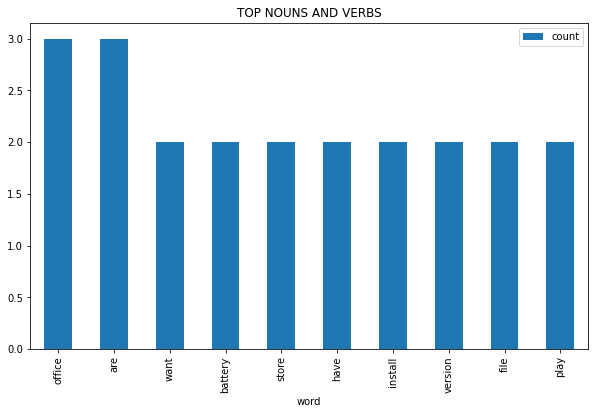

In [48]:
# Visualizing the Result (top 10 nouns+verbs)
wf_df[0:10].plot.bar(x='word', figsize=(10,6), title='TOP NOUNS AND VERBS')

## Emotion Mining

In [52]:
#sentiment analysis
afinn = pd.read_csv("afinn.csv", sep=',', encoding='latin-1')
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [53]:
afinn.shape

(2477, 2)

In [54]:
afinn.tail()

,word,value
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2
2476,zealous,2


In [56]:
book[0:3]

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders",
 "Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by wo

In [57]:
# Now we check sentiment score for sentences(reviews)
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(book))
sentences[5:15]

['), all printers are not compatible (e.g.',
 "the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by working on these (still mostly the document and slides either do not open in windows environment or have distortion issues).",
 'you need to spend extra for an external CD writer and tp buy a carry bag.',
 'Mac con not be connected to most of the projectors unless you buy some connectors, which are expensive and theres no clarity which one to buy and from where.',
 "you can't connect it to your TV, the ports are different and again theres no clarity - customer support, manuals or help section are silent !",
 'Marketing strategy for Indian market, if at all has been planned, has been very bad.',
 'If these critical issues (and a few more not mentioned here) are handled properly, the Mac can sweep away other laptops in India.',
 "Presently, it doesn't seem to be happening.Overall V

In [58]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,It's amazing..... battery last around 10 -12 h...
1,Got it in 50k in Diwali sale.
2,Technically good laptop.Good News.luxury produ...
3,Terrific sense of possession & pride.Bad News.
4,Problems will be there if you are switching fr...
...,...
182,You can get one of the best movie experiences ...
183,Overall I would it a 4.5/5.
184,"I got a great deal on this laptop, which I hav..."
185,I got it not only on discount but also was abl...


In [64]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [71]:
#custom function: score each word in a sentence in lemmatised form
#but calculate score for whole original sentences
#!python -m spacy download en
nlp = spacy.load('en_core_web_sm')

sentiment_laxicon = affinity_scores

In [73]:
def calculate_sentiment (text: str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score += sentiment_laxicon.get(word.lemma_, 0)
    return sent_score

In [79]:
# test that it work
calculate_sentiment(text='amazing')

4

In [80]:
calculate_sentiment(text='happiness')

3

In [81]:
calculate_sentiment(text='sad')

-2

In [85]:
calculate_sentiment(text='mad')

-3

In [88]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)
sent_df

,sentence,sentiment_value
0,It's amazing..... battery last around 10 -12 h...,7
1,Got it in 50k in Diwali sale.,0
2,Technically good laptop.Good News.luxury produ...,5
3,Terrific sense of possession & pride.Bad News.,4
4,Problems will be there if you are switching fr...,-11
...,...,...
182,You can get one of the best movie experiences ...,3
183,Overall I would it a 4.5/5.,0
184,"I got a great deal on this laptop, which I hav...",3
185,I got it not only on discount but also was abl...,0


In [89]:
# how many words are in the sentence
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      17
1       7
2      31
3       7
4      65
       ..
182    12
183     6
184    18
185    18
186     9
Name: word_count, Length: 187, dtype: int64

In [90]:
sent_df

,sentence,sentiment_value,word_count
0,It's amazing..... battery last around 10 -12 h...,7,17
1,Got it in 50k in Diwali sale.,0,7
2,Technically good laptop.Good News.luxury produ...,5,31
3,Terrific sense of possession & pride.Bad News.,4,7
4,Problems will be there if you are switching fr...,-11,65
...,...,...,...
182,You can get one of the best movie experiences ...,3,12
183,Overall I would it a 4.5/5.,0,6
184,"I got a great deal on this laptop, which I hav...",3,18
185,I got it not only on discount but also was abl...,0,18


In [91]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
110,"The build is super strong, the operating syste...",5,10
142,Except for not so good sound quality while wat...,5,19
179,great product The elegant work of apple can be...,5,13
64,I hope this comment can help to save somebody’...,6,10
103,The switch was inspired by the awesome reviews...,6,13
46,Ships with macOS sierra but update is availabl...,6,86
59,I use this for music production and it works a...,7,30
0,It's amazing..... battery last around 10 -12 h...,7,17
151,..So now I m working with the external keyboar...,17,113
86,"All are Gud.. For now.. Apple,apple,apple, tha...",24,184


In [92]:
# sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    187.000000
mean       0.914439
std        3.347789
min      -11.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       24.000000
Name: sentiment_value, dtype: float64

In [97]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
1,Got it in 50k in Diwali sale.,0,7
4,Problems will be there if you are switching fr...,-11,65
5,"), all printers are not compatible (e.g.",0,7
7,you need to spend extra for an external CD wri...,0,16
10,"Marketing strategy for Indian market, if at al...",-3,15
...,...,...,...
176,The service center guy told me it would cost a...,0,14
177,"Now I'm left with no option.If you are buying,...",-2,24
180,"The design, the user friendliness, the compact...",0,14
183,Overall I would it a 4.5/5.,0,6


In [98]:
sent_df[sent_df['sentiment_value']>=20]

,sentence,sentiment_value,word_count
86,"All are Gud.. For now.. Apple,apple,apple, tha...",24,184


In [99]:
sent_df['index']=range(0,len(sent_df))

In [100]:
sent_df

,sentence,sentiment_value,word_count,index
0,It's amazing..... battery last around 10 -12 h...,7,17,0
1,Got it in 50k in Diwali sale.,0,7,1
2,Technically good laptop.Good News.luxury produ...,5,31,2
3,Terrific sense of possession & pride.Bad News.,4,7,3
4,Problems will be there if you are switching fr...,-11,65,4
...,...,...,...,...
182,You can get one of the best movie experiences ...,3,12,182
183,Overall I would it a 4.5/5.,0,6,183
184,"I got a great deal on this laptop, which I hav...",3,18,184
185,I got it not only on discount but also was abl...,0,18,185


D:\anaconda\installation\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

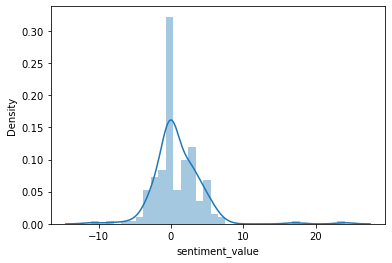

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

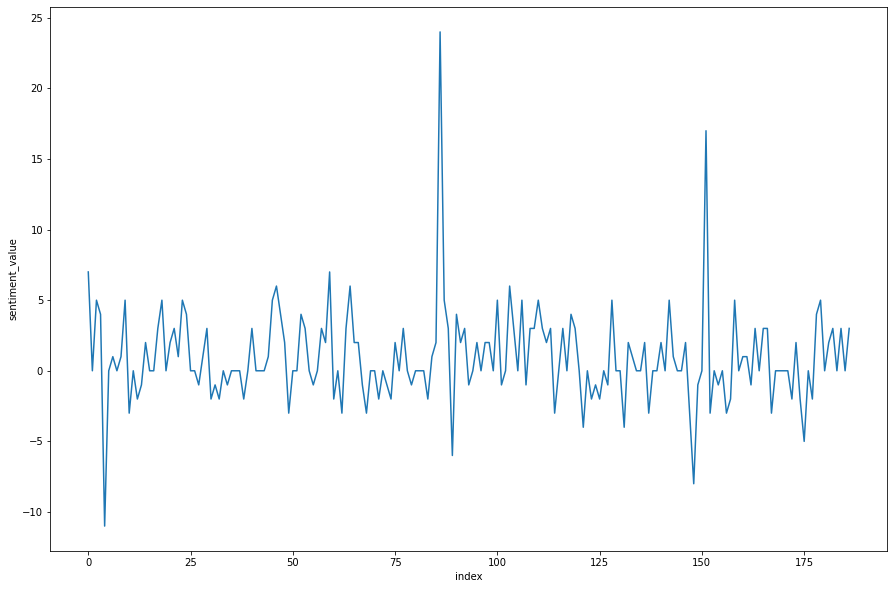

In [103]:
plt.figure(figsize=(15,10))
sns.lineplot(x='index', y='sentiment_value', data=sent_df)

<AxesSubplot:title={'center':'SENTENCE SENTIMENT VALUE TO SENTENCE WORD COUNT'}, xlabel='word_count', ylabel='sentiment_value'>

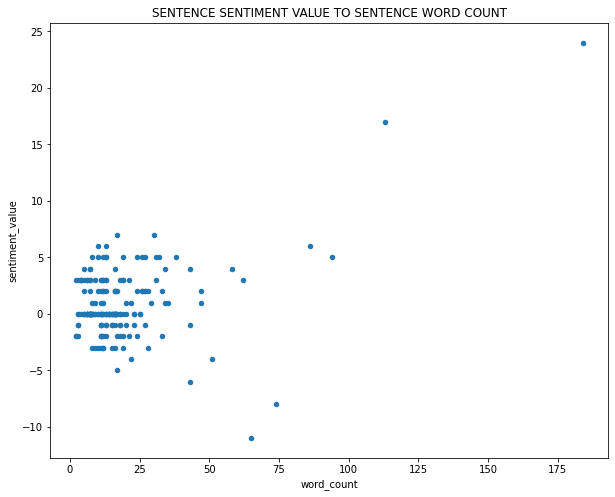

In [105]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(10,8), title='SENTENCE SENTIMENT VALUE TO SENTENCE WORD COUNT')